C:\Users\PTPL0125\AppData\Local\Temp\ipykernel_13188\2852167610.py:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='monthnum', y='Actual_Customer_type', data=data_2022, ax=axes[0], ci=None)
C:\Users\PTPL0125\AppData\Local\Temp\ipykernel_13188\2852167610.py:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='monthnum', y='Predicted_Customer_type', data=data_2022, ax=axes[0], ci=None, alpha=0.5)
C:\Users\PTPL0125\AppData\Local\Temp\ipykernel_13188\2852167610.py:50: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='region', y='Actual_Customer_type', data=data_2022, ax=axes[1], ci=None)
C:\Users\PTPL0125\AppData\Local\Temp\ipykernel_13188\2852167610.py:51: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='region', y='Predicted_Customer_type', data

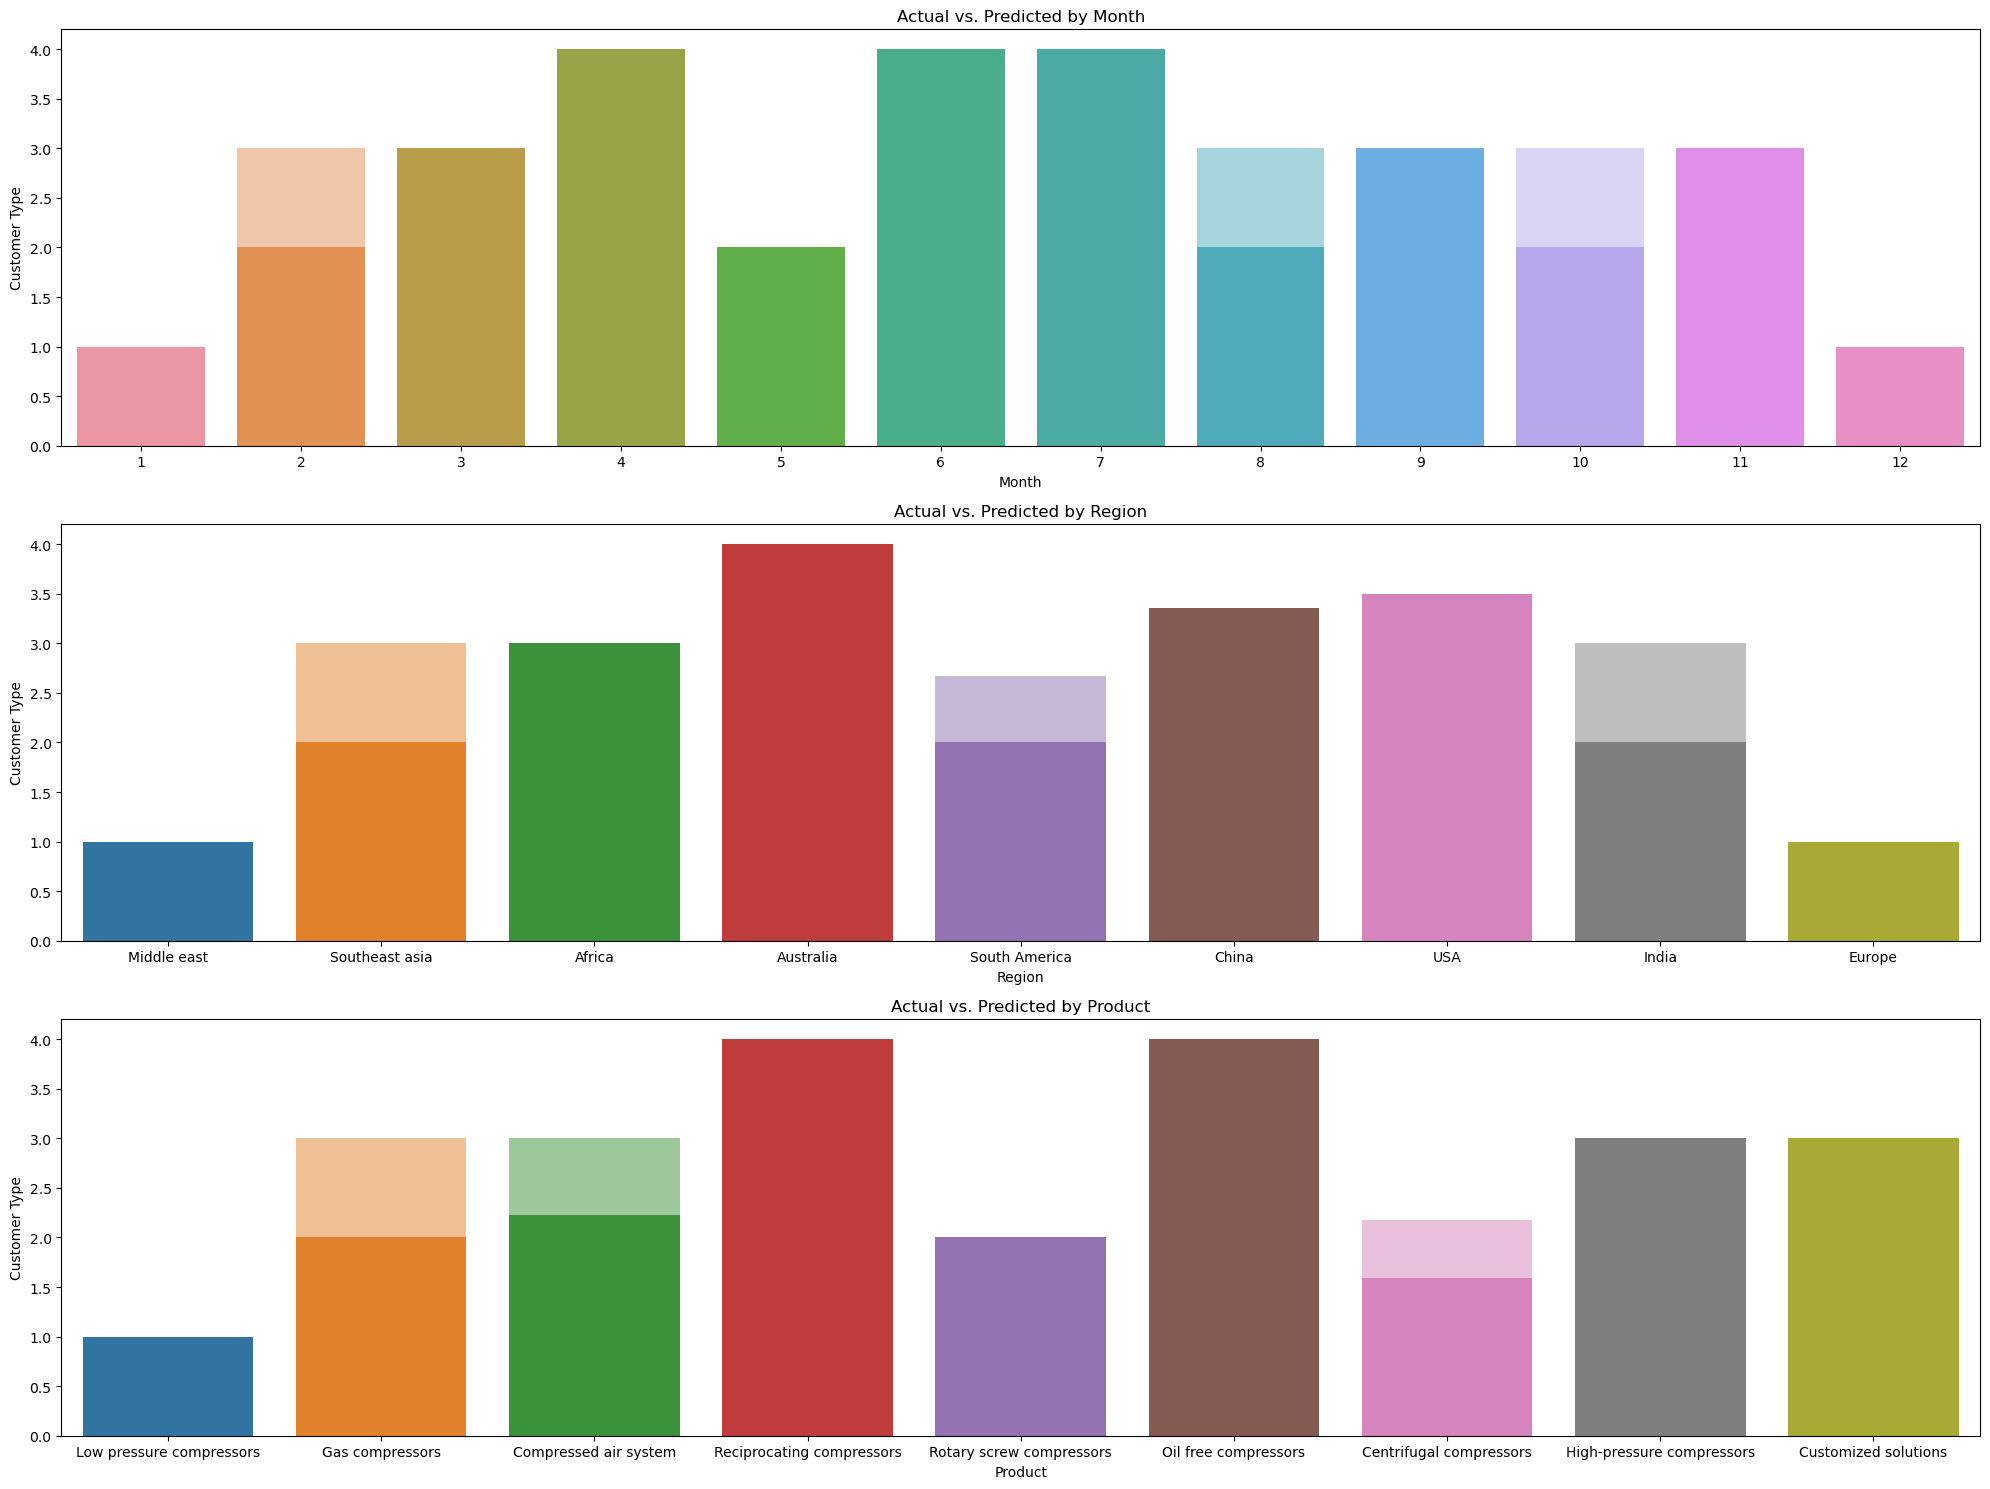

Accuracy on 2022 data: 0.6266666666666667
Classification report on 2022 data:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      0.19      0.31        27
           3       0.44      1.00      0.61        22
           4       1.00      0.67      0.80        18

    accuracy                           0.63        75
   macro avg       0.86      0.71      0.68        75
weighted avg       0.84      0.63      0.59        75



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Load your dataset (replace 'your_dataset.csv' with your actual file)
data = pd.read_csv('ELGI_2021.csv')

# Define the features (X) and target variable (y)
X = data[['monthnum', 'year', 'cust id', 'units', 'cost_per_unit', 'sales_cost', 'staff_qty', 'per_staff', 'staff_cost']]
y = data['Customer_type']  # Assuming 'Customer_Type' represents the customer types (1, 2, 3, 4)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predict customer types for 2023 (adjust the dataset accordingly)
data_2022 = pd.read_csv('ELGI_2022.csv')  # Replace with your 2023 data

data_2022_ = data_2022[['monthnum', 'year', 'cust id', 'units', 'cost_per_unit', 'sales_cost', 'staff_qty', 'per_staff', 'staff_cost']]

# Make predictions for 2022 data
predictions_2022 = clf.predict(data_2022_)

# Load the original 'ELGI_type_original.csv' data
customer_type = pd.read_csv('ELGI_type_original.csv')

# Add the actual and predicted values to the 'data_2022' DataFrame
data_2022['Actual_Customer_type'] = customer_type['Customer_type']
data_2022['Predicted_Customer_type'] = predictions_2022

# Create subplots for 'monthnum,' 'region,' and 'product'
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 15))  # Adjust figsize as needed

# Subplot 1: 'monthnum'
sns.barplot(x='monthnum', y='Actual_Customer_type', data=data_2022, ax=axes[0], ci=None)
sns.barplot(x='monthnum', y='Predicted_Customer_type', data=data_2022, ax=axes[0], ci=None, alpha=0.5)
axes[0].set_title('Actual vs. Predicted by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Customer Type')

# Subplot 2: 'region'
sns.barplot(x='region', y='Actual_Customer_type', data=data_2022, ax=axes[1], ci=None)
sns.barplot(x='region', y='Predicted_Customer_type', data=data_2022, ax=axes[1], ci=None, alpha=0.5)
axes[1].set_title('Actual vs. Predicted by Region')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Customer Type')

# Subplot 3: 'product'
sns.barplot(x='categories', y='Actual_Customer_type', data=data_2022, ax=axes[2], ci=None)
sns.barplot(x='categories', y='Predicted_Customer_type', data=data_2022, ax=axes[2], ci=None, alpha=0.5)
axes[2].set_title('Actual vs. Predicted by Product')
axes[2].set_xlabel('Product')
axes[2].set_ylabel('Customer Type')

# Adjust layout
plt.tight_layout()

# Save the plot if needed
plt.savefig('actual_vs_predicted_subplots.png')

# Show the plot
plt.show()

# Evaluate the model's performance on the 2022 data
accuracy_2022 = accuracy_score(data_2022['Actual_Customer_type'], predictions_2022)
classification_report_2022 = classification_report(data_2022['Actual_Customer_type'], predictions_2022)

print("Accuracy on 2022 data:", accuracy_2022)
print("Classification report on 2022 data:\n", classification_report_2022)


C:\Users\PTPL0125\AppData\Local\Temp\ipykernel_13188\4076495774.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='monthnum', y='staff_qty', data=data[data['year'] == 2021], ax=axes[0, 0], ci=None)
C:\Users\PTPL0125\AppData\Local\Temp\ipykernel_13188\4076495774.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='monthnum', y='staff_qty', data=data[data['year'] == 2022], ax=axes[0, 1], ci=None)
C:\Users\PTPL0125\AppData\Local\Temp\ipykernel_13188\4076495774.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='monthnum', y='staff_cost', data=data[data['year'] == 2021], ax=axes[1, 0], ci=None)
C:\Users\PTPL0125\AppData\Local\Temp\ipykernel_13188\4076495774.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='monthnum', y='staff_cost', 

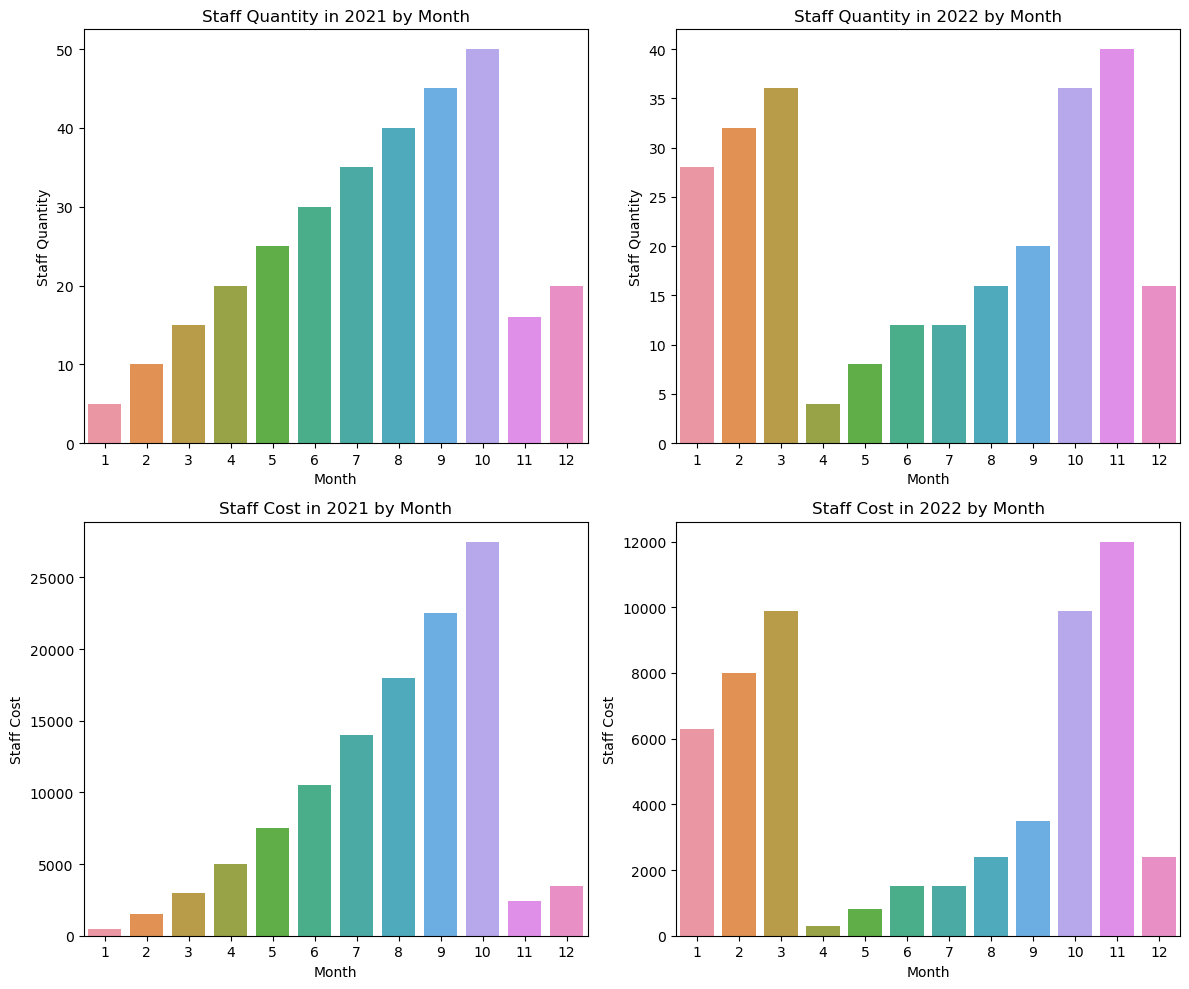

In [2]:

data = pd.read_excel('ELGI.xlsx')



# Create subplots for 'staff_qty' and 'staff_cost' by month for 2021 and 2022
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))  # Adjust figsize as needed

# Subplot 1: 'staff_qty' for 2021
sns.barplot(x='monthnum', y='staff_qty', data=data[data['year'] == 2021], ax=axes[0, 0], ci=None)
axes[0, 0].set_title('Staff Quantity in 2021 by Month')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Staff Quantity')

# Subplot 2: 'staff_qty' for 2022
sns.barplot(x='monthnum', y='staff_qty', data=data[data['year'] == 2022], ax=axes[0, 1], ci=None)
axes[0, 1].set_title('Staff Quantity in 2022 by Month')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Staff Quantity')

# Subplot 3: 'staff_cost' for 2021
sns.barplot(x='monthnum', y='staff_cost', data=data[data['year'] == 2021], ax=axes[1, 0], ci=None)
axes[1, 0].set_title('Staff Cost in 2021 by Month')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Staff Cost')

# Subplot 4: 'staff_cost' for 2022
sns.barplot(x='monthnum', y='staff_cost', data=data[data['year'] == 2022], ax=axes[1, 1], ci=None)
axes[1, 1].set_title('Staff Cost in 2022 by Month')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Staff Cost')

# Adjust layout
plt.tight_layout()

# Save the plot if needed
plt.savefig('staff_qty_and_cost_by_month.png')

# Show the plot
plt.show()
